In [29]:
# %load_ext autoreload
# %autoreload 2
import numpy as np
# import azul.tictactoe as logic 
import azul.logic as logic
import azul.ai as ai
from random import choice 

state = {'factory': [[], [], [], [], [], [], []], 'center': [], 'player': [{'grid': [[1, 2, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 43, 'floor': []}, {'grid': [[1, 2, 3, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 4], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': []}], 'activePlayer': 2, 'roundIdx': 5}

# state = logic.reset_round()


# logic.print_state(state)

rewards = []
for i in range(5000):
    stateCp = logic.deepcopy(state)
    rewards.append(logic.get_reward(stateCp))

np.mean(rewards, axis=0), np.std(rewards, axis=0)
# logic.print_state(state)

(array([1., 0., 0.]), array([0., 0., 0.]))

In [28]:
state = {'factory': [[], [], [], [], [], [], []], 'center': [], 'player': [{'grid': [[1, 2, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 43, 'floor': []}, {'grid': [[1, 2, 3, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 4], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': []}], 'activePlayer': 2, 'roundIdx': 5}

logic.get_reward(state)

Factory:
[]
[]
[]
[]
[]
[]
[]
  []
Player 0: 52
 line:  [[], [5], [], [1, 1], []]
 grid:  [[1, 2, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]]
 floor:  []
Player 1: 43
 line:  [[], [], [], [4], [4, 4, 4, 4]]
 grid:  [[1, 2, 3, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 2: 23
 line:  [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]]
 grid:  [[1, 2, 3, 4, 0], [5, 1, 2, 3, 4], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]]
 floor:  []
roundsLeft=0


[52, 43, 23]

In [54]:
# !python3 -m pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="g7cXVyNktyp3UNsfS79K")
# project = rf.workspace("garamizo").project("azul-ea1mg")
# dataset = project.version(1).download("yolov5")
from ultralytics import YOLO
 
# Load the model.
model = YOLO('yolov8n.pt')
 

# Training.
results = model.train(
   data='../datasets/data.yaml',
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_azul'
)

# model.export(format="onnx")

New https://pypi.org/project/ultralytics/8.0.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.109 🚀 Python-3.8.10 torch-1.13.0+cu117 CPU
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../datasets/data.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_azul, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, 

In [146]:
import cv2 
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
# model = YOLO('best.pt')
# model.export(format="onnx")  # export the model to ONNX format

# 1 bottle, 1 chair, 1 book, 1 scissors, 102.9ms
# img = cv2.cvtColor(cv2.resize(cv2.imread('assets/templates/ingame1.jpg'), [640, 640]), cv2.COLOR_BGR2RGB)

# 1 bottle, 1 chair, 1 book, 1 scissors, 103.9ms
# img = cv2.resize(cv2.imread('assets/templates/ingame3.jpg'), [800, 600])
# img = cv2.imread('assets/templates/ingame2.jpg')
# img = cv2.imread('/home/garamizo/Downloads/car.jpg')
src = np.float32([[750, 0], [3200, 0], [3800, 2600], [0, 2600]])  # whole table
dst = np.float32([[150, 150], [2650, 150], [2650, 2650], [150, 2650]])
matrix = cv2.getPerspectiveTransform(src, dst)
img = cv2.resize(cv2.warpPerspective(cv2.imread('assets/templates/ingame1.jpg'), matrix, (2800, 2800)), [640, 640])


# img = cv2.imread('assets/templates/ingame1.jpg')
results = model.predict(source=img, save=False, save_txt=False, conf=0.25)
# results = model(['assets/templates/ingame1.jpg', 'assets/templates/ingame3.jpg'], conf=0.3)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

probs


0: 640x640 2 bottles, 1 cup, 1 book, 1 clock, 201.3ms
Speed: 4.0ms preprocess, 201.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


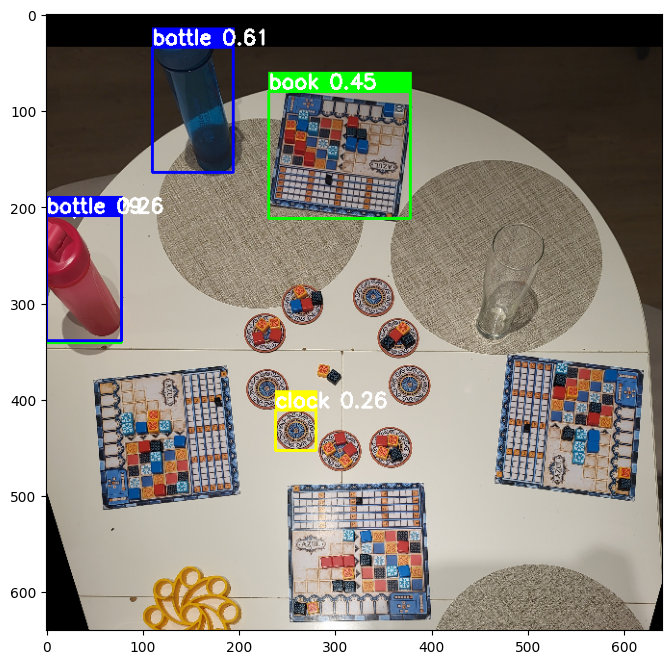

In [147]:
# frame = cv2.imread('assets/templates/ingame3.jpg')
frame = img.copy()

class_ids, confidences, boxes = [], [], []
for (x, y, x2, y2, conf, id) in results[-1].boxes.data:
    class_ids.append(int(id))
    confidences.append(float(conf))
    boxes.append(np.int32([x, y, x2-x, y2-y]))

colors = [(255, 255, 0), (0, 255, 0), (0, 255, 255), (255, 0, 0)]

for (classid, confidence, box) in zip(class_ids, confidences, boxes):
    color = colors[int(classid) % len(colors)]
    cv2.rectangle(frame, box, color, 2)
    cv2.rectangle(frame, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
    cv2.putText(frame, f"{model.names[classid]} {confidence:.2}", 
                (box[0], box[1] - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB));

In [40]:
frame.shape

(640, 640, 3)

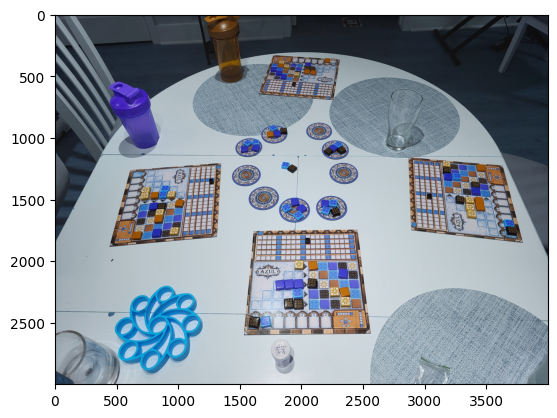

In [1]:
import matplotlib.pyplot as plt 
import cv2 

img = cv2.imread('assets/templates/ingame2.jpg')
# img = cv2.cvtColor(cv2.resize(cv2.imread('assets/templates/ingame2.jpg'), [640, 640]), cv2.COLOR_BGR2RGB)

plt.imshow(img);

In [25]:
import cv2 

# net = cv2.dnn.readNet('/home/garamizo/Downloads/yolov5s.onnx')
# net = cv2.dnn.readNet('best.onnx')

class_list = []
with open("/home/garamizo/Downloads/classes.txt", "r") as f:
    class_list = [cname.strip() for cname in f.readlines()]

def format_yolov5(source):

    # put the image in square big enough
    col, row, _ = source.shape
    _max = max(col, row)
    resized = np.zeros((_max, _max, 3), np.uint8)
    resized[0:col, 0:row] = source
    
    # resize to 640x640, normalize to [0,1[ and swap Red and Blue channels
    result = cv2.dnn.blobFromImage(resized, 1/255.0, (640, 640), swapRB=True)
    
    return result


def unwrap_detection(input_image, output_data):
    class_ids = []
    confidences = []
    boxes = []

    rows = output_data.shape[0]

    image_width, image_height, _ = input_image.shape

    x_factor = image_width / 640
    y_factor =  image_height / 640

    for r in range(rows):
        row = output_data[r]
        confidence = row[4]
        if confidence >= 0.4:

            classes_scores = row[5:]
            _, _, _, max_indx = cv2.minMaxLoc(classes_scores)
            class_id = max_indx[1]
            if (classes_scores[class_id] > .25):

                confidences.append(confidence)

                class_ids.append(class_id)

                x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item() 
                left = int((x - 0.5 * w) * x_factor)
                top = int((y - 0.5 * h) * y_factor)
                width = int(w * x_factor)
                height = int(h * y_factor)
                box = np.array([left, top, width, height])
                boxes.append(box)

    return class_ids, confidences, boxes

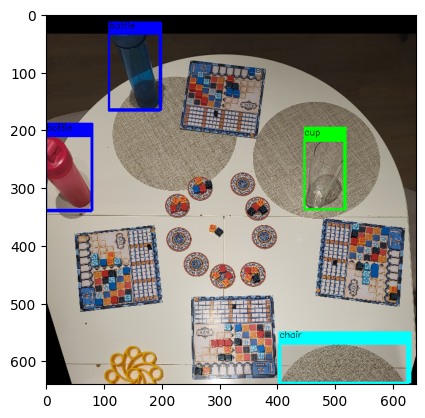

In [84]:
# frame = cv2.resize(cv2.imread('/home/garamizo/Downloads/car.jpg'), [640, 640])
src = np.float32([[750, 0], [3200, 0], [3800, 2600], [0, 2600]])  # whole table
dst = np.float32([[150, 150], [2650, 150], [2650, 2650], [150, 2650]])
matrix = cv2.getPerspectiveTransform(src, dst)
frame = cv2.resize(cv2.warpPerspective(cv2.imread('assets/templates/ingame1.jpg'), matrix, (2800, 2800)), [640, 640])

blob = cv2.dnn.blobFromImage(frame , 1/255.0, (640, 640), swapRB=True)
# blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)

predictions = net.forward()
class_ids, confidences, boxes = unwrap_detection(frame, predictions[0])

colors = [(255, 255, 0), (0, 255, 0), (0, 255, 255), (255, 0, 0)]

for (classid, confidence, box) in zip(class_ids, confidences, boxes):
    color = colors[int(classid) % len(colors)]
    cv2.rectangle(frame, box, color, 2)
    cv2.rectangle(frame, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
    cv2.putText(frame, class_list[classid], (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB));

In [85]:
%%timeit
blob = cv2.dnn.blobFromImage(frame , 1/255.0, (640, 640), swapRB=True)
net.setInput(blob)

predictions = net.forward()
class_ids, confidences, boxes = unwrap_detection(frame, predictions[0])

238 ms ± 8.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
blob.shape, frame.shape

((1, 3, 640, 640), (640, 640, 3))

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

MIN_MATCH_COUNT = 2

def get_matched_coordinates(temp_img, map_img, show=True):
    """
    Gets template and map image and returns matched coordinates in map image

    Parameters
    ----------
    temp_img: image
        image to be used as template

    map_img: image 
        image to be searched in

    Returns
    ---------
    ndarray
        an array that contains matched coordinates

    """

    # initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(temp_img, None)
    kp2, des2 = sift.detectAndCompute(map_img, None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # find matches by knn which calculates point distance in 128 dim
    matches = flann.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32(
            [kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32(
            [kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        # find homography
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

        h, w = temp_img.shape
        pts = np.float32([[0, 0], [0, h-1], [w-1, h-1],
                          [w-1, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, M)  # matched coordinates
        
        map_img = cv2.polylines(
            map_img, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    else:
        print("Not enough matches are found - %d/%d" %
              (len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                       singlePointColor=None,
                       matchesMask=matchesMask,  # draw only inliers
                       flags=2)

    # draw template and map image, matches, and keypoints
    img3 = cv2.drawMatches(temp_img, kp1, map_img, kp2,
                           good, None, **draw_params)

    # if --show argument used, then show result image
    if show:
        plt.imshow(img3, 'gray'), plt.show()
    return dst

In [3]:
template = cv2.resize(cv2.imread('assets/templates/board.png'), [700, 700])
map = cv2.imread('assets/templates/ingame1.jpg')

src = np.float32([[750, 0], [3200, 0], [3800, 2600], [0, 2600]])  # whole table
dst = np.float32([[150, 150], [2650, 150], [2650, 2650], [150, 2650]])
matrix = cv2.getPerspectiveTransform(src, dst)
map = cv2.warpPerspective(map, matrix, (2800, 2800))

# read images
temp_img_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
map_img_gray = cv2.cvtColor(map, cv2.COLOR_RGB2GRAY)

# equalize histograms
temp_img_eq = cv2.equalizeHist(temp_img_gray)
map_img_eq = cv2.equalizeHist(map_img_gray)

# calculate matched coordinates
# coords = get_matched_coordinates(temp_img_eq, map_img_eq, show=False)

(250, 250, 3)

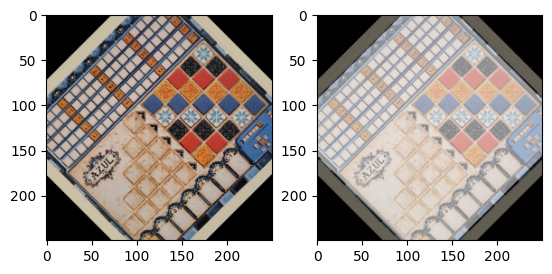

In [26]:
TMPT_SHAPE = (250, 250)
TMPT_ANGLE = 45

template = cv2.resize(
    cv2.cvtColor(cv2.imread('assets/templates/board.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), TMPT_SHAPE)
warp_mat = cv2.getRotationMatrix2D((TMPT_SHAPE[1]//2, TMPT_SHAPE[0]//2), TMPT_ANGLE, 1)
for i in range(3):
    template[:,:,i] = cv2.warpAffine(template[:,:,i], warp_mat, TMPT_SHAPE)

BORD = 15
mask = np.zeros(TMPT_SHAPE, np.uint8)
mask[BORD:-BORD, BORD:-BORD] = 255
mask = cv2.warpAffine(mask, warp_mat, TMPT_SHAPE)

plt.subplot(121), plt.imshow(template);
plt.subplot(122), plt.imshow(cv2.addWeighted(template, 0.5, np.stack([mask]*3, axis=2), 0.5, 0.0));
template.shape

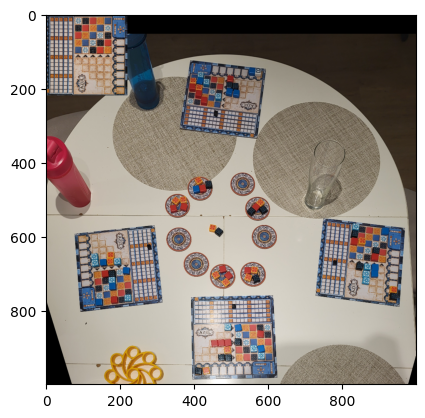

In [38]:
img = map.copy()
h, w, c = template.shape
img[:w, :h, :] = template 
plt.imshow(img);

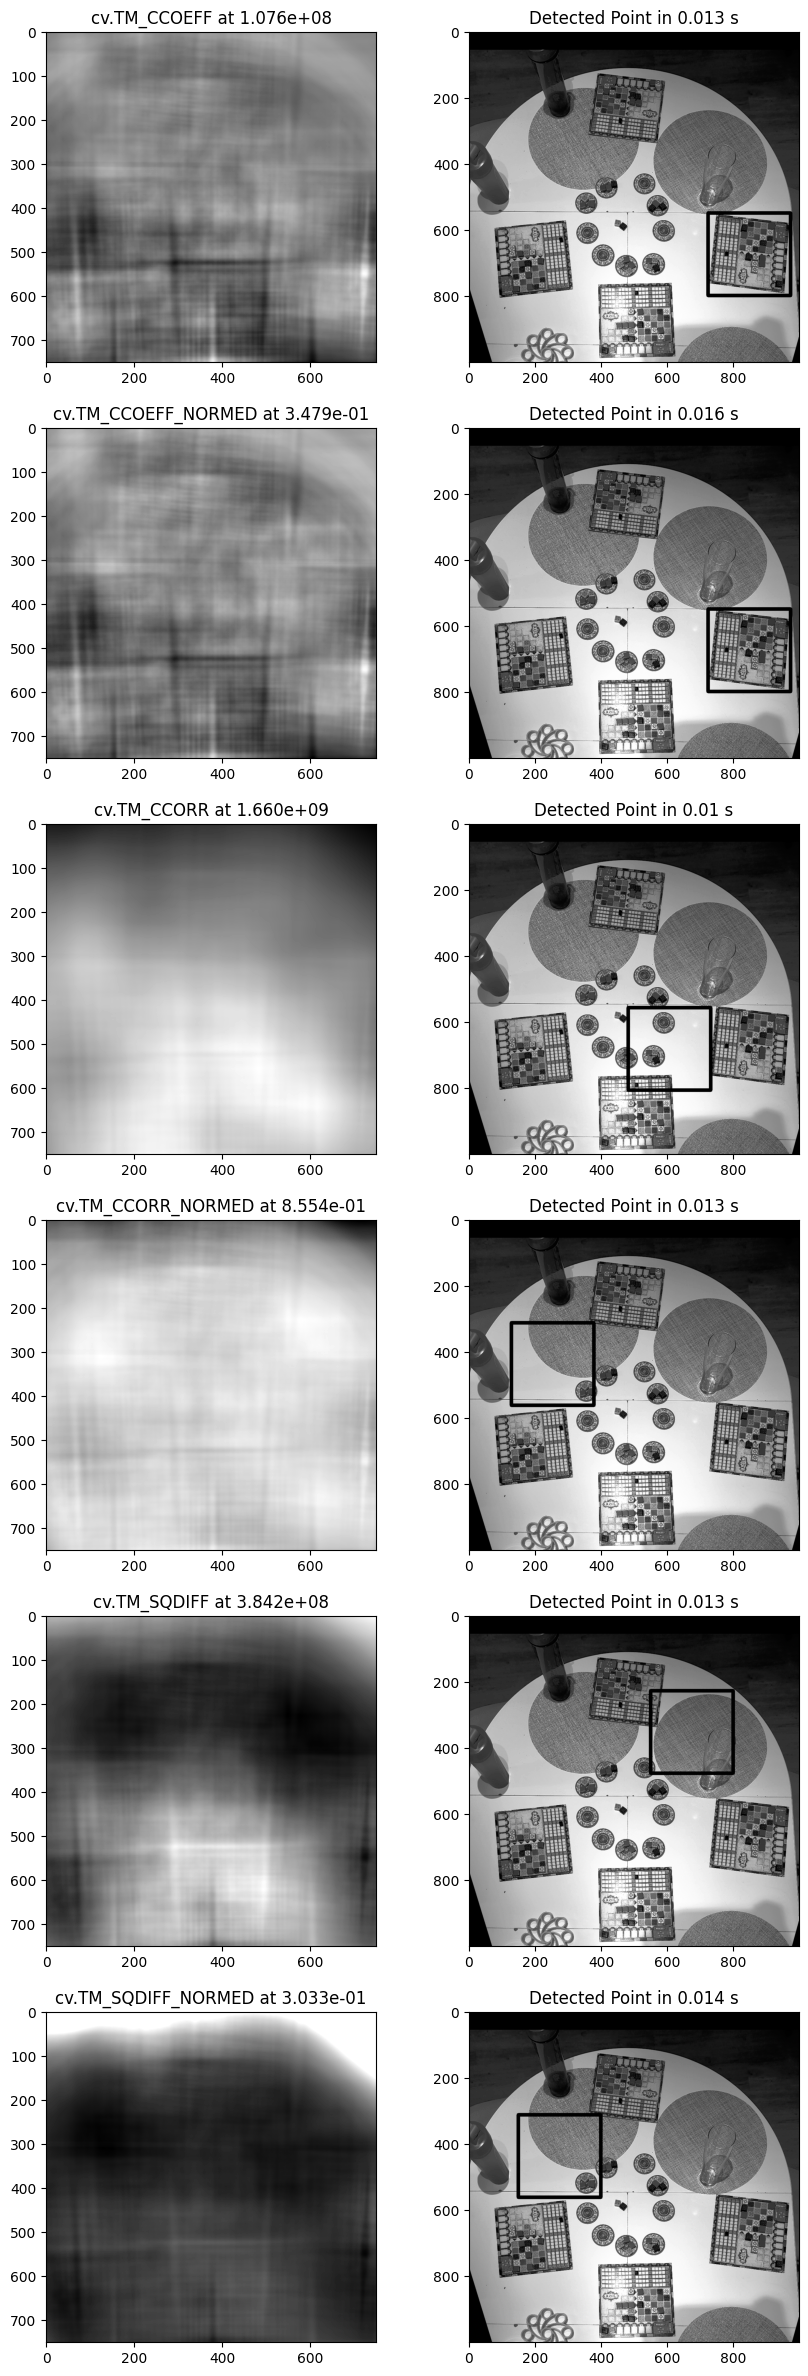

In [41]:
import cv2 as cv 
from time import time 

USE_COLOR = False 
TMPT_SHAPE = (250, 250)
TMPT_ANGLE = 90

src = np.float32([[750, 0], [3200, 0], [3800, 2600], [0, 2600]])  # whole table
dst = np.float32([[150, 150], [2650, 150], [2650, 2650], [150, 2650]])
matrix = cv2.getPerspectiveTransform(src, dst)

warp_mat = cv2.getRotationMatrix2D((TMPT_SHAPE[1]//2, TMPT_SHAPE[0]//2), TMPT_ANGLE, 1)

BORD = 15
mask = np.ones(TMPT_SHAPE, np.uint8) * 0
mask[BORD:-BORD, BORD:-BORD] = 1
mask = cv2.warpAffine(mask, warp_mat, TMPT_SHAPE)
mask = None

if USE_COLOR:
    template = cv2.resize(
        cv2.cvtColor(cv2.imread('assets/templates/board.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), TMPT_SHAPE)
    for i in range(3):
        template[:,:,i] = cv2.warpAffine(template[:,:,i], warp_mat, TMPT_SHAPE)
    # template = template[BORD:-BORD, BORD:-BORD,:]

    map = cv2.cvtColor(cv2.imread('assets/templates/ingame1.jpg'), cv2.COLOR_BGR2RGB)
    map = cv2.warpPerspective(map, matrix, (2800, 2800))
    map = cv2.resize(map, [1000, 1000])

else:
    template = cv2.equalizeHist(cv2.resize(
        cv2.imread('assets/templates/board.png', cv2.IMREAD_GRAYSCALE), TMPT_SHAPE))
    template = cv.warpAffine(template, warp_mat, TMPT_SHAPE)
    # template = template[BORD:-BORD, BORD:-BORD]

    map = cv2.imread('assets/templates/ingame1.jpg', cv2.IMREAD_GRAYSCALE)
    map = cv2.warpPerspective(map, matrix, (2800, 2800))
    map = cv2.equalizeHist(cv2.resize(map, [1000, 1000]))

h, w = template.shape[:2]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
# bad ones: cv.TM_CCORR, cv.TM_SQDIFF
plt.figure(figsize=(10,30))
for i, meth in enumerate(methods):
    img = map.copy()
    method = eval(meth)
    # Apply template Matching
    t0 = time()
    res = cv.matchTemplate(img,template,method, mask=mask)
    duration = time() - t0
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
        best_val = min_val
    else:
        top_left = max_loc
        best_val = max_val
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img,top_left, bottom_right, 0, 10)

    plt.subplot(len(methods),2,i*2+1), 
    plt.imshow(res,cmap = 'gray')
    plt.title(f"{meth} at {best_val:.3e}"), #plt.xticks([]), plt.yticks([])

    plt.subplot(len(methods),2,i*2+2),
    plt.imshow(img,cmap = 'gray')
    plt.title(f'Detected Point in {duration:.2} s'), #plt.xticks([]), plt.yticks([])

plt.show()

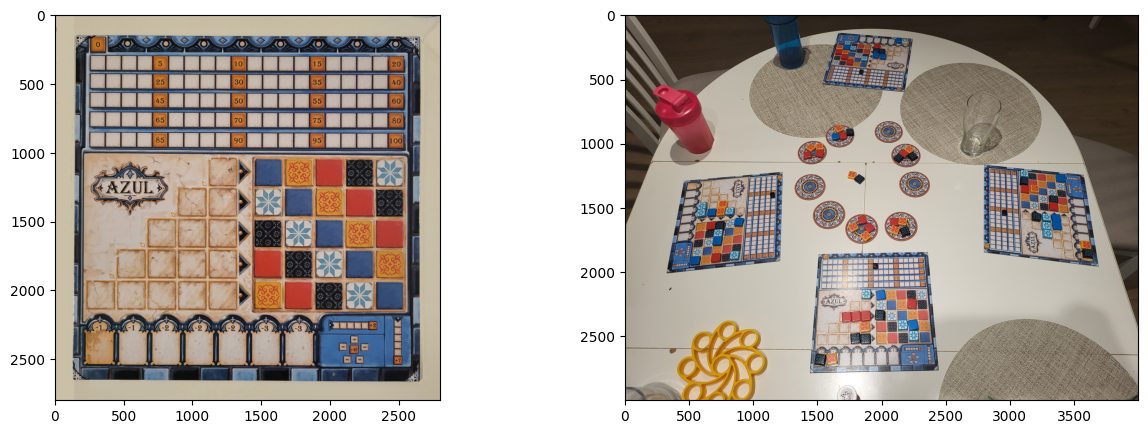

In [30]:
import cv2 as cv 
import matplotlib.pyplot as plt 

img = cv.imread('assets/templates/ingame1.jpg')
template = cv.imread('assets/templates/board.png')



plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

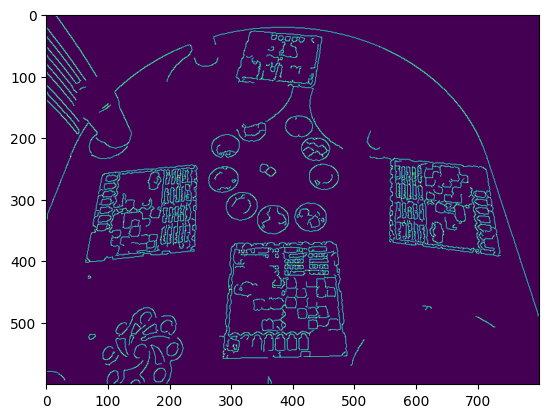

In [9]:
import cv2 

img = cv.imread('assets/templates/ingame1.jpg')
img = cv2.resize(img, [4000//5, 3000//5])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (7,7), 0) 

sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

plt.imshow(edges);

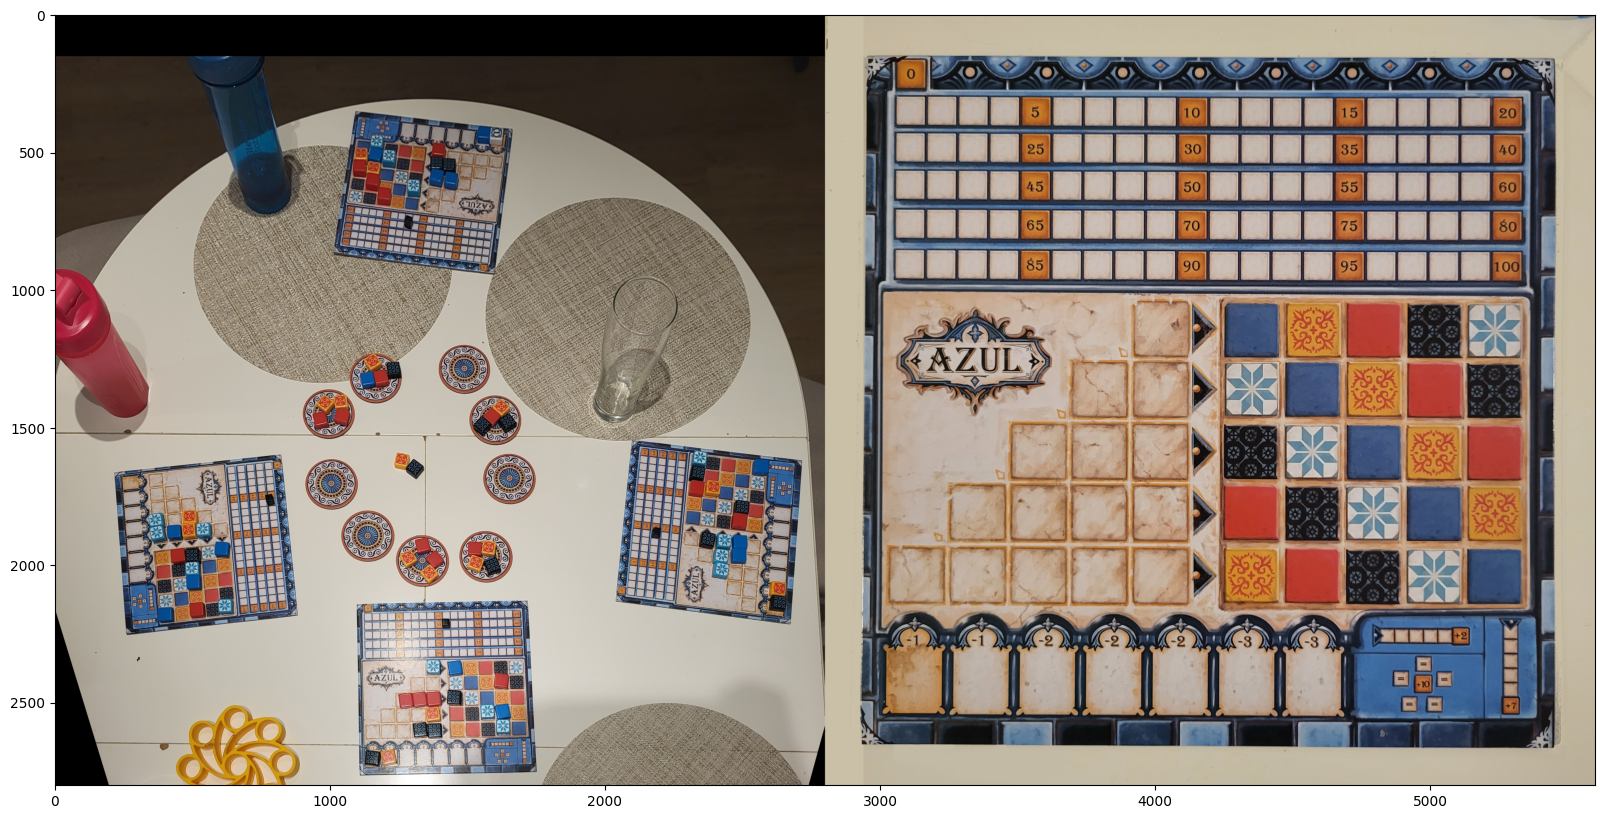

In [31]:
w, h, c = template.shape
# ingame1
# src = np.float32([[1506, 1862], [2355, 1846], [2441, 2768], [1439, 2790]])  # p0
# src = np.float32([[2792, 1849], [2795, 1168], [3570, 1245], [3687, 1959]])  # p1
# src = np.float32([[2176, 600], [1537, 529], [1662, 136], [2237, 183]])  # p2
# src = np.float32([[1226, 1222], [1204, 1914], [323, 2008], [460, 1290]])  # p3
src = np.float32([[750, 0], [3200, 0], [3800, 2600], [0, 2600]])  # whole table
dst = np.float32([[150, 150], [2650, 150], [2650, 2650], [150, 2650]])

matrix = cv.getPerspectiveTransform(src, dst)
result = cv.warpPerspective(img, matrix, (2800, 2800))

result = np.concatenate([result, template], axis=1)

plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB));

In [150]:
matrix

array([[ 4.89292855e-01,  5.57020528e+00, -7.20696725e+03],
       [-4.44550458e+00, -9.91612398e-02,  5.77106029e+03],
       [-9.67119217e-06,  2.80824739e-04,  1.00000000e+00]])

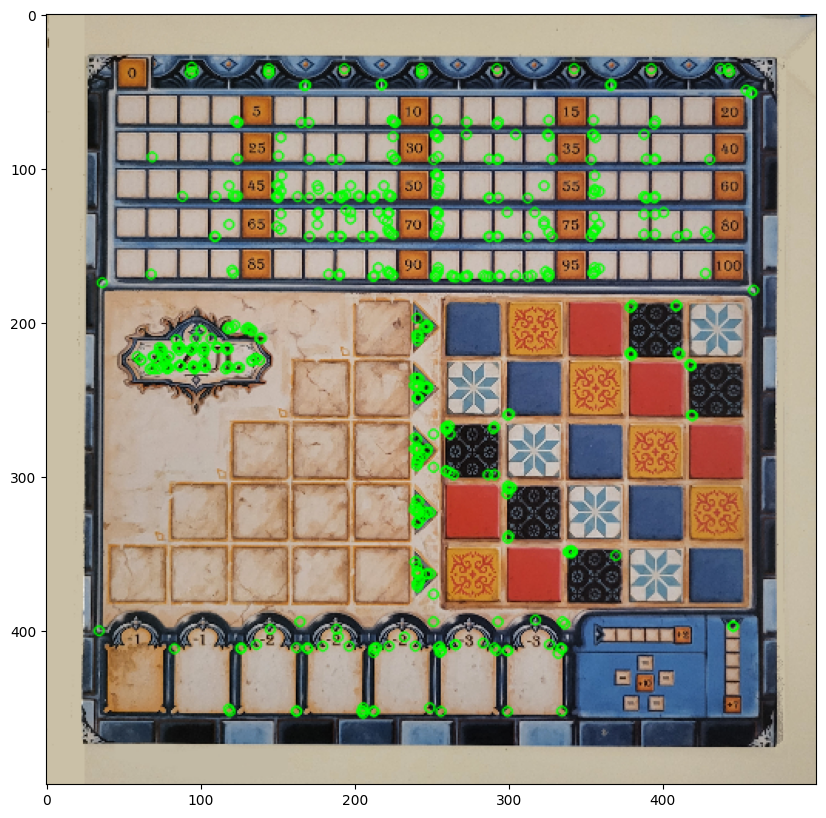

In [135]:
templateRes = cv.resize(template, [500, 500])

orb = cv.ORB_create()
kp = orb.detect(templateRes, None)
kp, des = orb.compute(templateRes, kp)

img2 = cv.drawKeypoints(templateRes, kp, None, color=(0,255,0), flags=0)
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))


In [124]:
state = logic.reset_round()
state['grid'] = (np.array([
    [0, 2, 0, 0],
    [0, 1, 3, 3],
    [1, 2, 2, 3],
    [1, 0, 0, 1]
]) -1).tolist()
state['activePlayer'] = 2 - 1

root = ai.MCTS_node(state)
root.grow(timeout=5)

logic.print_state(state)
# logic.get_reward(state)
# logic.is_terminal(state)
# ai.maxn(state, 8, -100)
root.print()
root.get_best_action()

activePlayer=1	numPlayers=3	startingPlayer=0	roundIdx=0
   | 1 |   |  
---+---+---+---
   | 0 | 2 | 2
---+---+---+---
 0 | 1 | 1 | 2
---+---+---+---
 0 |   |   | 0
self.numRolls=82629, self.numWins=0, self.state['activePlayer']=1
	Action		UCB	WRatio	NumSims
	[0, 0]	0.23	0.172	6725
	[0, 2]	0.23	0.175	7541
	[0, 3]	0.23	0.208	47772
	[1, 0]	0.23	0.174	7336
	[3, 1]	0.23	0.171	6531
	[3, 2]	0.23	0.172	6724


([0, 3], 2)

In [117]:
state = logic.reset_round()
state['grid'] = (np.array([
    [0, 2, 0, 0],
    [0, 1, 3, 3],
    [0, 2, 2, 3],
    [1, 0, 0, 0]
]) -1).tolist()

logic.get_reward(state)

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [4]:
# Simulate a full game
import azul.ai as ai
from random import seed 
import azul.logic as logic
from copy import deepcopy
# seed(1)

t = logic.Table()
state = t.get_observation()

agents = [
    lambda state: ai.get_random_action(state),
    # lambda state: ai.alphabeta(state, 1, 4, -np.Inf, np.Inf, state['activePlayer'])[1],
    # lambda state: ai.negamax(state, 1, 4, state['activePlayer'])[1],
    lambda state: ai.get_random_action(state),
]

info = []
while not (t.is_round_over() and t.is_game_over()):
    state = deepcopy(t.get_observation())
    action = agents[state['activePlayer']](state)
    
    factoryIdx, color, row = action
    assert t.is_valid(color, factoryIdx, row), "Invalid action"
    info.append({'state': deepcopy(state), 'action': action})
    t.step_move(color, factoryIdx, row)

# ai.get_reward(state), state
# ai.get_reward(t.get_observation()), t.get_observation()
state

{'factory': [[], [], [], [], []],
 'center': [5],
 'player': [{'grid': [[1, 0, 3, 4, 5],
    [0, 1, 2, 0, 4],
    [4, 0, 0, 0, 0],
    [0, 4, 5, 0, 0],
    [2, 0, 0, 0, 1]],
   'line': [[2], [3, 3], [2, 2], [], [4]],
   'score': 0,
   'floor': [-1, 1, 4, 4, 3]},
  {'grid': [[1, 0, 3, 4, 5],
    [5, 0, 0, 3, 4],
    [4, 5, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [2, 0, 0, 0, 0]],
   'line': [[2], [], [1], [4, 4, 4], [1, 1]],
   'score': 0,
   'floor': [5, 5, 5, 5, 5, 2, 1, 1]}],
 'activePlayer': 1,
 'roundIdx': 7}

In [122]:
# %load_ext snakeviz
# %load_ext autoreload
# %autoreload 2
import azul.ai as ai
from random import seed 
import azul.logic as logic
from azul.logic import deepcopy
# from copy import deepcopy

state = logic.reset_round(numPlayers=3)
root = ai.MCTS_node(deepcopy(state))
# root.grow_while(timeout=10)

logic.print_state(state)
result = []
for i in range(10):
    root.grow_while(timeout=10)
    action, actionIdx = root.get_best_action()

    result.append({
        'avgRatio': root.child[actionIdx].numWins / root.child[actionIdx].numRolls,
        'numRolls': root.child[actionIdx].numRolls,
        'UCB': root.child[actionIdx].eval(),
        'action': action.copy()})
# root.numRolls # root.print()

Factory:
[5, 5, 2, 2]
[3, 4, 1, 1]
[1, 1, 5, 1]
[4, 3, 5, 2]
[1, 2, 4, 2]
[4, 2, 2, 4]
[4, 5, 5, 2]
  [-1]
Player 0: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 1: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 2: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []


In [123]:
result

[{'avgRatio': 0.5376014367333035,
  'numRolls': 50,
  'UCB': 1.1086425216251627,
  'action': [4, 2, 1]},
 {'avgRatio': 0.45321487308718783,
  'numRolls': 230,
  'UCB': 0.7442140374841406,
  'action': [6, 4, 0]},
 {'avgRatio': 0.44090517243077965,
  'numRolls': 453,
  'UCB': 0.6550172108679483,
  'action': [2, 1, 1]},
 {'avgRatio': 0.43685323498863693,
  'numRolls': 620,
  'UCB': 0.6223593870005628,
  'action': [2, 1, 2]},
 {'avgRatio': 0.44381034178765366,
  'numRolls': 977,
  'UCB': 0.5937207998762969,
  'action': [2, 1, 1]},
 {'avgRatio': 0.4467354345367716,
  'numRolls': 1397,
  'UCB': 0.5735103987720841,
  'action': [2, 1, 2]},
 {'avgRatio': 0.45045628765224255,
  'numRolls': 1886,
  'UCB': 0.5603016388858073,
  'action': [2, 1, 2]},
 {'avgRatio': 0.4598490472412569,
  'numRolls': 2962,
  'UCB': 0.5481622039868387,
  'action': [2, 1, 2]},
 {'avgRatio': 0.45482839862422947,
  'numRolls': 3314,
  'UCB': 0.5388364962782473,
  'action': [2, 1, 2]},
 {'avgRatio': 0.4523496313742568,
  '

In [113]:
logic.print_state(state)

Factory:
[1, 3, 2, 5]
[3, 4, 1, 5]
[4, 2, 4, 4]
[1, 3, 3, 4]
[2, 5, 2, 1]
[3, 5, 4, 2]
[3, 4, 3, 4]
  [-1]
Player 0: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 1: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 2: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []


In [91]:
%%timeit 
# import azul.utils as utils
# import copy
# state = logic.reset_round(numPlayers=3)

# logic.deepcopy(state)  # 6.72 us
# copy.deepcopy(state)  # 78.5 us
# utils.deepcopy(state)  # 27.2 us

logic.get_action_space(state)  # 39.4 us

38.5 µs ± 705 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [105]:
numPlayer = 4
numFactory = logic.NUM_FACTORY_VS_PLAYER[numPlayer]
actionSpace = np.zeros([
    numPlayer, numFactory, logic.NUM_COLORS, logic.NUM_LINES], 
    dtype=bool)

colors = np.arange(logic.NUM_COLORS) + 1

# a player pick a factory
activePlayer, factoryIdx, color, line = 0, 1, 3, 2
otherColors = state['factory'][factoryIdx].remove(color)
actionSpace[:,factoryIdx,color,:] = False 
actionSpace[activePlayer,:,colors!=color,line] = False


{'factory': [[2, 3, 2, 5],
  [4, 3, 5, 5],
  [1, 2, 3, 1],
  [1, 5, 4, 4],
  [1, 5, 2, 1],
  [5, 5, 4, 1],
  [4, 5, 1, 4]],
 'center': [-1],
 'player': [{'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []},
  {'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []},
  {'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []}],
 'activePlayer': 0,
 'roundIdx': 0}

In [111]:
grid = np.zeros([5, 5], bool)
lineColor = np.zeros(5)
lineNum = np.zeros(5)


In [74]:
from azul.logic import deepcopy

state = logic.reset_round(numPlayers=3)
stateNew = deepcopy(state)
# stateNew['factory'][0][0] = 100  # ok
# stateNew['center'] = [-100]  # ok
# stateNew['roundIdx'] = 1000  # ok
# stateNew['player'][0]['grid'][0][0] = 100  # ok
stateNew['player'][0]['score'] = 101

state

{'factory': [[4, 3, 3, 4],
  [3, 5, 5, 3],
  [2, 4, 3, 4],
  [2, 5, 3, 1],
  [3, 3, 3, 3],
  [1, 4, 2, 1],
  [2, 2, 3, 2]],
 'center': [-1],
 'player': [{'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []},
  {'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []},
  {'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []}],
 'activePlayer': 0,
 'roundIdx': 0}

In [78]:
%%snakeviz -t
root.grow_while(timeout=10)  # 8317 rolls/10 s
# remove np from score_board: 11238 / 10s 3P
# root.print()

 
*** Profile stats marshalled to file '/tmp/tmpa8_6wpp_'.
Opening SnakeViz in a new tab...
snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Ftmp%2Ftmpa8_6wpp_
Opening in existing browser session.


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



In [27]:
root.numRolls

5489

In [28]:
%load_ext autoreload
%autoreload 2
import numpy as np

# njit 3.19 us
# np 66.5 us
# native  3.6 us
# grid = np.array(state['player'][1]['grid'])
grid = [
    [1, 2, 3, 4, 5],
    [5, 1, 0, 3, 4],
    [0, 5, 1, 2, 3],
    [3, 0, 0, 1, 0],
    [2, 0, 0, 5, 1]]
%timeit logic.score_board(grid)
# logic.score_board(grid)

# %timeit logic.score_board(state['player'][0]['grid']) 
# logic.score_board(np.array(state['player'][0]['grid'])) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
4.88 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
# from azul.ai import get_reward_simple, get_reward, negamax, alphabeta
import azul.ai as ai
from copy import deepcopy

# t = logic.Table()
# obs = t.get_observation()
obs = logic.reset_round()

# ai.negamax(obs, 1, 4, obs['activePlayer']), \
# ai.alphabeta(obs, 1, 4, -np.Inf, np.Inf, obs['activePlayer'])
# ai.alphabeta(obs, 1, 4, -np.Inf, np.Inf, obs['activePlayer'])

# ai.get_reward_simple(obs)
rewards = []
actions = logic.get_action_space(obs)
for action in actions:
    state = deepcopy(obs)
    logic.play(state, action)
    rewards.append(logic.get_reward_simple(state))

# ai.negamax(deepcopy(obs), 1, 2, obs['activePlayer']), \
ai.alphabeta(deepcopy(obs), 1, 2, -np.Inf, np.Inf, obs['activePlayer']), \
    actions, rewards

# ai.is_terminal(obs)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [96]:
# Simulate a full game
state = ai.reset_round()

agents = [
    # lambda state: ai.get_random_action(state),
    lambda state: ai.alphabeta(state, 1, 3, -np.Inf, np.Inf, state['activePlayer'])[1],
    lambda state: ai.get_random_action(state),
]

while not ai.is_game_over(state):
    while not ai.is_terminal(state):
        action = agents[state['activePlayer']](state)
        assert ai.is_valid_action(state, action), "Invalid action"
        ai.play(state, action)

    ai.reset_round(state)

ai.get_reward(state), state

([0, 8],
 {'factory': [[], [], [], [], []],
  'center': [],
  'player': [{'grid': [[0, 0, 3, 0, 0],
     [0, 0, 0, 0, 4],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0]],
    'line': [[], [], [], [], []],
    'score': 0,
    'floor': []},
   {'grid': [[1, 2, 3, 4, 5],
     [5, 0, 2, 0, 4],
     [0, 0, 0, 0, 0],
     [3, 4, 5, 0, 0],
     [0, 0, 0, 0, 0]],
    'line': [[], [], [1, 1], [], [2, 2]],
    'score': 8,
    'floor': []}],
  'activePlayer': 1,
  'roundIdx': 5})

In [72]:
state['player'][1]

{'grid': [[1, 2, 3, 4, 5],
  [5, 0, 0, 0, 0],
  [0, 5, 0, 2, 0],
  [0, 0, 0, 0, 2],
  [0, 0, 0, 0, 0]],
 'line': [[], [3], [4, 4], [], [4, 4, 4]],
 'score': 2,
 'floor': [3,
  2,
  5,
  5,
  1,
  3,
  2,
  2,
  2,
  3,
  1,
  1,
  1,
  1,
  1,
  5,
  5,
  5,
  5,
  1,
  1,
  1,
  1,
  3,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  5,
  5]}

In [67]:
np.array([[]] * 5).tolist()

[[], [], [], [], []]

In [38]:
t = logic.Table()
obs = t.get_observation()

ai.negamax(deepcopy(obs), 1, 2, obs['activePlayer'])  # 4.6s
# ai.alphabeta(deepcopy(obs), 1, 3, -np.Inf, np.Inf, obs['activePlayer'])

(1, [4, 1, 2])

In [40]:
from azul.ai import get_heuristics
from copy import deepcopy

t = azul.Table()
rewards = []
for reps in range(1):
    obs = t.get_observation()

    obs['player'][0]['line'][4] = [1]

    obs['player'][0]['grid'] = [
        [0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 5, 0, 0],
        [0, 0, 4, 0, 0]]

    obs['player'][1]['grid'] = [
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]

    obs['player'][2]['grid'] = [
        [0, 0, 3, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 5, 0, 0, 0],
        [0, 0, 5, 0, 0],
        [0, 0, 0, 0, 0]]
    
    rewards.append(get_heuristics(obs))

# get_heuristics(obs), obs['player']
# min([min([g.count(0) for g in p['grid']]) for p in obs['player']])
obs['player']
# np.mean(rewards, axis=0), np.std(rewards, axis=0)


ImportError: cannot import name 'get_heuristics' from 'azul.ai' (/home/garamizo/Azul-Board-Game/azul/ai.py)

In [ ]:
# %%timeit 
from azul.ai import get_random_action, get_action_space, play, is_terminal, get_reward, MCTS_node, get_winner
from azul.logic import random_move 

t = azul.Table()
obs = t.get_observation()
obsOld = deepcopy(obs)

root = MCTS_node(obsOld)
MCTS_node.grow(root, timeout=1.0)

# action = get_random_action(obs)  # 35 us
action, _ = MCTS_node.get_best_action(root)

play(obs, action)

# random_move(obs)  # 19.9 us
# get_action_space(obs)
# play(obs, action)
# action, obs
# get_reward(obs)
# len(root.action)
# root.rollout()

# root.print()
rootNew = MCTS_node.search_node(root, obs)
# obs, obsOld
rootNew.print()
root.print()

self.numRolls=26, self.numWins=18, self.state['activePlayer']=1
	Action		UCB	WRatio	NumSims
	[-1, 3, -1]	2.55	0.000	1
	[-1, 3, 0]	3.55	1.000	1
	[-1, 3, 4]	3.55	1.000	1
	[-1, 4, 3]	2.55	0.000	1
	[0, 4, 1]	2.55	0.000	1
	[0, 4, 2]	2.55	0.000	1
	[0, 4, 4]	3.55	1.000	1
	[0, 5, 2]	2.55	0.000	1
	[0, 5, 4]	2.55	0.000	1
	[1, 1, 0]	2.55	0.000	1
	[1, 1, 3]	2.55	0.000	1
	[1, 2, -1]	2.55	0.000	1
	[1, 2, 0]	2.55	0.000	1
	[1, 2, 1]	2.55	0.000	1
	[1, 5, -1]	3.55	1.000	1
	[2, 3, 4]	3.55	1.000	1
	[2, 4, 1]	2.55	0.000	1
	[2, 4, 2]	2.55	0.000	1
	[2, 4, 4]	2.55	0.000	1
	[3, 2, 2]	3.55	1.000	1
	[3, 4, 3]	2.55	0.000	1
	[3, 4, 4]	2.55	0.000	1
	[3, 5, 0]	3.55	1.000	1
	[3, 5, 1]	2.55	0.000	1
	[3, 5, 2]	3.55	1.000	1
self.numRolls=1468, self.numWins=0, self.state['activePlayer']=0
	Action		UCB	WRatio	NumSims
	[0, 3, -1]	1.41	0.200	10
	[0, 3, 0]	1.44	0.680	25
	[0, 3, 1]	1.39	0.438	16
	[0, 3, 2]	1.40	0.526	19
	[0, 3, 3]	1.40	0.471	17
	[0, 3, 4]	1.40	0.640	25
	[0, 4, -1]	1.44	0.333	12
	[0, 4, 0]	1.40	0.550	20
	[0, 4

In [ ]:
# == takes 80.2 ns
actions = {'a':[1, 1, 2], 'b':[2, 1, 1], 'c':[3, 2, 1]}
actions2 = {'a':[1, 1, 2], 'b':[2, 1, 1]}
actions2['c'] = [3, 2, 1]

# == takes 64 ns
# actions = [[1, 1, 2], [2, 1, 1], [3, 2, 1]]
# actions2 = [[1, 1, 2], [2, 1, 1]]
# actions2.append([3, 2, 1])
# b = [1, 2]

child = {str(a): None for a in actions}

actions == actions2
# actions, actions2
# b == None
str(actions)

"{'a': [1, 1, 2], 'b': [2, 1, 1], 'c': [3, 2, 1]}"

In [ ]:
%load_ext autoreload
%autoreload 2

from azul.ai import MCTS_node, get_random_action
from azul.logic import random_move, Table

t = Table()
obs = t.get_observation()

root = MCTS_node(obs, 0)
root.grow()

root.print()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.numRolls=2638, self.numWins=0, self.state['activePlayer']=0
	Action		UCB	WRatio	NumSims
	[0, 1, -1]	1.24	0.462	26
	[0, 1, 0]	1.23	0.417	24
	[0, 1, 1]	1.22	0.500	30
	[0, 1, 2]	1.23	0.440	25
	[0, 1, 3]	1.23	0.440	25
	[0, 1, 4]	1.23	0.440	25
	[0, 2, -1]	1.25	0.500	28
	[0, 2, 0]	1.25	0.481	27
	[0, 2, 1]	1.24	0.350	20
	[0, 2, 2]	1.24	0.545	33
	[0, 2, 3]	1.24	0.462	26
	[0, 2, 4]	1.24	0.462	26
	[0, 3, -1]	1.24	0.559	34
	[0, 3, 0]	1.25	0.481	27
	[0, 3, 1]	1.24	0.571	35
	[0, 3, 2]	1.24	0.462	26
	[0, 3, 3]	1.23	0.440	25
	[0, 3, 4]	1.25	0.500	28
	[0, 5, -1]	1.25	0.595	37
	[0, 5, 0]	1.23	0.440	25
	[0, 5, 1]	1.23	0.440	25
	[0, 5, 2]	1.22	0.391	23
	[0, 5, 3]	1.22	0.391	23
	[0, 5, 4]	1.25	0.500	28
	[1, 3, -1]	1.24	0.583	36
	[1, 3, 0]	1.23	0.516	31
	[1, 3, 1]	1.25	0.481	27
	[1, 3, 2]	1.23	0.531	32
	[1, 3, 3]	1.23	0.440	25
	[1, 3, 4]	1.24	0.571	35
	[1, 4, -1]	1.25	0.381	21
	[1, 4, 0]	1.25	0.381	21
	[1, 4, 1]	1.

In [ ]:
a = 1 
b = None

if a is not None:
    print('not none')

if a is None or b is None:
    print('none')

not none
none


In [ ]:
grid = np.array([
    [0, 2, 3, 4, 5],
    [5, 1, 2, 3, 4],
    [4, 5, 1, 2, 3],
    [3, 4, 5, 1, 2],
    [2, 3, 4, 5, 1]])
np.sum(grid == 1)

discard = [1, 2, 2, 1, 2, 4]
# if discard.count(-1) > 0:
#     discard.remove(-1)
# np.random.permutation(discard)
# discard.remove(1)
discard.clear()
discard

[]

In [ ]:
np.random.seed(100)
t = azul.Table()

# t.player[0].grid = np.array([
#     [1, 2, 3, 4, 5],
#     [0, 1, 0, 3, 4],
#     [4, 0, 1, 0, 3],
#     [0, 4, 0, 0, 2],
#     [0, 3, 4, 0, 0]])

# t.step_move(mark=5, factoryIdx=0, playerIdx=0, row=1)
# t.step_move(mark=5, factoryIdx=6, playerIdx=0, row=2)
# t.step_move(mark=1, factoryIdx=-1, playerIdx=0, row=4)
# t.print()
# t.player[0].print()
obs = t.get_observation()

# mark, factoryIdx, row = azul.random_move(0, obs)
# mark, factoryIdx, row
playerPolicyFcn = [azul.random_move] * 3
t.step_round(playerPolicyFcn)
# mark, factoryIdx, row = playerPolicyFcn[0](
#     0, obs)
# len(obs['factory'])
t.print()

[]
[]
[]
[]
[]
  []
[[], [3], [2], [], [4, 4, 4]]
[[1. 2. 3. 4. 5.]
 [5. 0. 2. 0. 4.]
 [4. 5. 0. 0. 0.]
 [3. 4. 0. 1. 0.]
 [2. 0. 0. 0. 0.]]
[]
8
---
[[], [3], [4], [2, 2], []]
[[1. 2. 3. 4. 5.]
 [5. 1. 2. 0. 4.]
 [0. 5. 1. 2. 3.]
 [3. 0. 0. 0. 0.]
 [0. 3. 0. 5. 0.]]
[]
31
---




In [ ]:
t.print()
t.player[0].print()
t.player[1].print()

obs = t.get_observation()
azul.valid_move(obs,playerIdx=0, factoryIdx=-1, mark=5, row=1)

[]
[]
[]
[]
[]
  [1, 1, 1]
---
[[3], [3], [5], [4, 4, 4], [5, 5]]
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]]
[-1, 3, 3, 3]
4
---
[[5], [5], [2, 2, 2], [5, 5, 5], [4, 4, 4, 4, 4]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[5, 5]
0
---


False